# An Introduction to Quantum Probability Amplitude Modulation (QPAM) from a Compositional Perspective

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
from qiskit.visualization import plot_histogram
import os

## State initialization and measurement

Initializing the circuit with the probability amplitudes [0.5, 0.5, 0.5, 0.5]

In [52]:
# 2 quantum registers for 4 outputs
register = QuantumRegister(2)
circuit = QuantumCircuit(register) 
# probability amplitudes of the 4 notes
prob_amp = np.array([0.5, 0.5, 0.5, 0.5]) 
# add 2 classical registers 
creg = ClassicalRegister(register.size, 'c') 
circuit.add_register(creg)
# initialising the state vector
circuit.initialize(prob_amp, register)
# Prepare each quantum register for measurement
circuit.measure(register, creg)

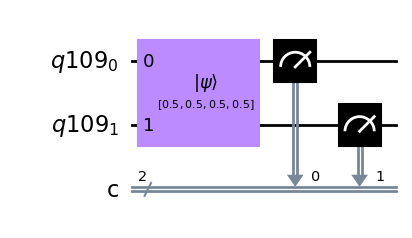

In [53]:
circuit.draw(output = 'mpl') # Resultant circuit. The initialisation is done through a gate

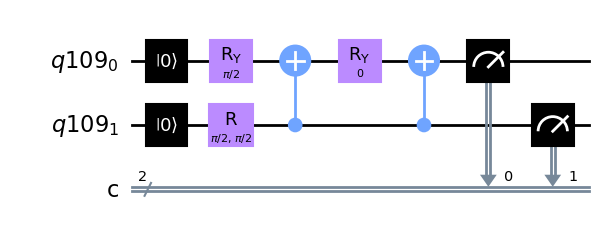

In [54]:
circuit.decompose().decompose().decompose().decompose().decompose().draw(output = 'mpl') # Decomposing the gate reveals the resultant circuit

Each iteration of the circuit gives a different result. Run the following code multiple times. 

Note: if you get the error ```IndexError: index 3 is out of bounds for axis 0 with size 3```, just run it again

{'00': 6, '10': 4, '01': 5, '11': 5}


(0.0, 6.0)

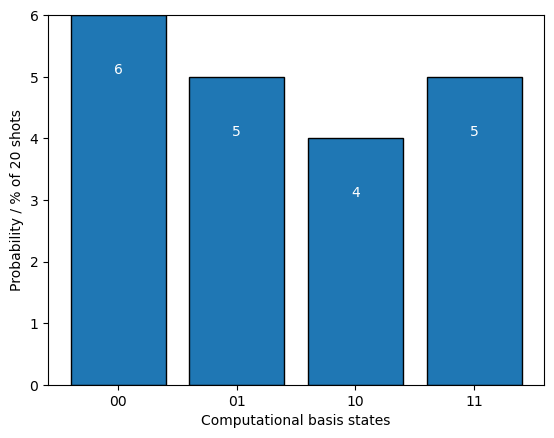

In [55]:
shots = 20 # Any number of shots. Feel free to change
simulator = Aer.get_backend('qasm_simulator')
measurement = execute(circuit, simulator, shots=shots) # Execute measurement
simulation_result = measurement.result()
counts = simulation_result.get_counts(circuit) # dictionary for output
print(counts)

amplitudes = np.zeros(len(counts))
index = np.array([int(key, 2) for key in counts])
amplitudes[index] = list(counts.values())

binary = ['00', '01', '10', '11']
plt.bar(binary, amplitudes, edgecolor='black')
plt.yticks(np.arange(0, max(amplitudes) + 1, 1))
plt.ylabel(f'Probability / % of {shots} shots')
plt.xlabel('Computational basis states')

for ind, amp in enumerate(amplitudes):
    # print(amplitudes)
    plt.text(binary[ind], amp-1, str(int(amp)), ha='center', va='bottom', c='white')

# ax.flat[id].text(binary[ind], amplitudes-1, str(int(amplitudes)), ha='center', va='bottom', c='white')
plt.ylim([0,max(amplitudes)])

## Composing with Quantum Probability Amplitude Modulation (QPAM)

1) Prepare the circuit

In [56]:
regsize = 2
register = QuantumRegister(2) # 2 qubits for 4 outputs
circuit2 = QuantumCircuit(register)

creg = ClassicalRegister(register.size, 'c')
circuit2.add_register(creg)

2) Convert the amplitudes into probability amplitudes by normalizing

In [57]:
notes = [7,8,9,8] # intervals of the musical gesture. In the long run, this can be anything (rhythmic structures, frequencies etc..)
prob_amp = notes/np.linalg.norm(notes)
prob_amp

array([0.43580096, 0.49805825, 0.56031553, 0.49805825])

3) Initialite the circuit and measurement

In [58]:
circuit2.initialize(prob_amp, register)
circuit2.measure(register, creg)

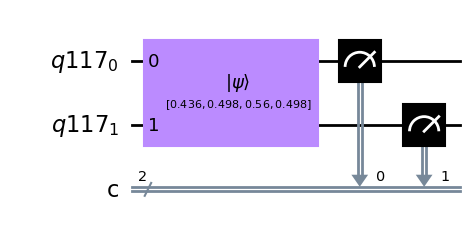

In [59]:
circuit2.draw(output = 'mpl')

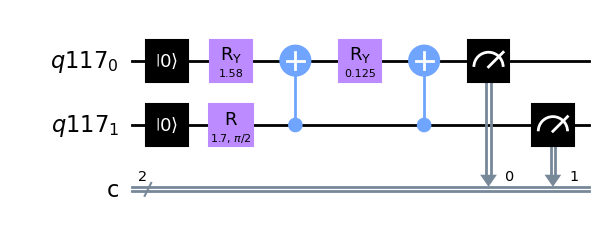

In [60]:
circuit2.decompose().decompose().decompose().decompose().decompose().draw(output = 'mpl')

{'10': 21, '01': 20, '11': 11, '00': 8}


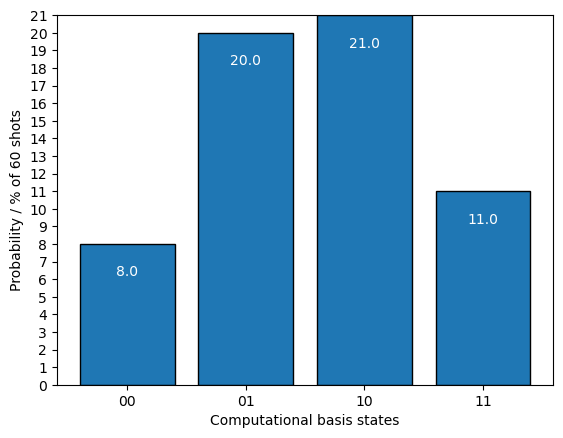

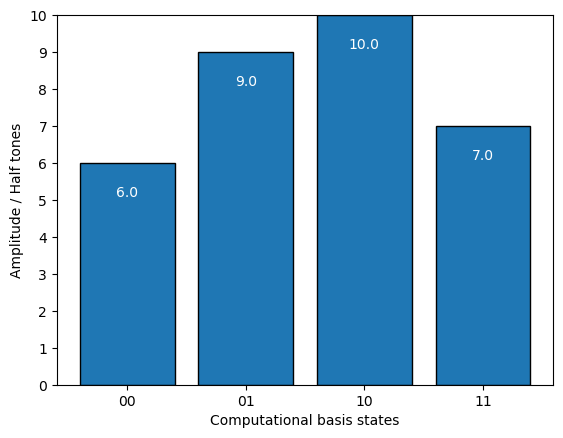

In [71]:
shots = 60 # Any number of shots
simulator = Aer.get_backend('qasm_simulator')
measurement = execute(circuit2, simulator, shots=shots) # Execute measurement
simulation_result = measurement.result()
counts = simulation_result.get_counts(circuit2) # dictionary for output
print(counts)

amplitudes = np.zeros(len(counts))
index = np.array([int(key, 2) for key in counts])
amplitudes[index] = list(counts.values())

binary = ['00', '01', '10', '11']
plt.bar(binary, amplitudes, edgecolor='black')
plt.yticks(np.arange(0, max(amplitudes) + 1, 1))
plt.ylabel(f'Probability / % of {shots} shots')
plt.xlabel('Computational basis states')
plt.ylim([0,max(amplitudes)])

for i in range(len(binary)):
    plt.text(binary[i], amplitudes[i]-2, str(amplitudes[i]), ha='center', va='bottom', c = 'white')

plt.show()

counts = {key: np.linalg.norm(notes)*np.sqrt(value/shots) for key, value in counts.items()} # Remapping the results back to the original range
amplitudes = np.zeros(len(counts))
index = np.array([int(key, 2) for key in counts])
amplitudes[index] = list(counts.values())
amplitudes = amplitudes.round(0)

binary = ['00', '01', '10', '11']
plt.bar(binary, amplitudes, edgecolor='black')
plt.yticks(np.arange(0, max(amplitudes) + 1, 1))
plt.ylim([0,max(amplitudes)])
plt.ylabel('Amplitude / Half tones')
plt.xlabel('Computational basis states')
for i in range(len(binary)):
    plt.text(binary[i], amplitudes[i]-1, str(amplitudes[i]), ha='center', va='bottom', c ='white')
# plt.title('Histogram')
# plt.grid()
plt.show()

For quickly executing multiple sets of measurements:

In [105]:
times = 10

for i in range(times):
    shots = 20 # Any number of shots
    simulator = Aer.get_backend('qasm_simulator')
    measurement = execute(circuit2, simulator, shots=shots) # Execute measurement
    simulation_result = measurement.result()
    counts = simulation_result.get_counts(circuit2) # dictionary for output
    amplitudes = np.zeros(len(counts))
    print(counts)

{'01': 5, '00': 5, '10': 6, '11': 4}
{'01': 4, '10': 10, '11': 4, '00': 2}


{'11': 7, '10': 6, '01': 4, '00': 3}
{'11': 7, '00': 2, '01': 5, '10': 6}
{'00': 7, '10': 3, '01': 4, '11': 6}
{'11': 6, '01': 8, '10': 3, '00': 3}
{'11': 6, '01': 7, '10': 5, '00': 2}
{'10': 7, '11': 3, '01': 4, '00': 6}
{'10': 6, '11': 8, '00': 2, '01': 4}
{'01': 5, '00': 7, '11': 6, '10': 2}
